# Практика №6
## Проста лінійна регресія. Градієнтний спуск.


In [1]:
# імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

#### Генерування даних для навчання моделі

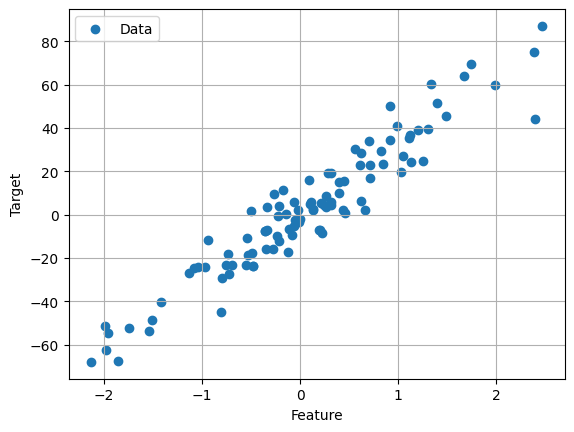

In [2]:
X, Y = make_regression(n_samples=100, n_features=1, n_informative=1,
                       noise=10, random_state=10)

plt.scatter(X, Y, label='Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()

### Функція втрат - середньоквадратична помилка (MSE)

$$MSE = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-\text{y_pred}_i})^2 = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-(w_1\cdot X_i + w_0)})^2 = \frac{1}{n}\sum_{i=0}^n{(\text{y}_i-w_1\cdot X_i - w_0})^2$$



### Градієнт функції середньоквадратичної помилки

Розпишемо градієнт окремо для коефіцієнта зсуву ($\omega_0$) і коефіцієнта нахилу ($\omega_1$).

Коефіцієнт зсуву:
$$\frac{∂ MSE}{∂ w_0} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot (-1)$$

Коефіцієнт нахилу:
$$\frac{∂ MSE}{∂ w_1} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot (-X)$$


#### Завдання

1. Реалізувати функцію втрат тобто функцію $MSE$.
2. Реалізувати функцію розрахунку градієнтів для вищевказаної функції втрат.
3. Реалізувати цикл градієнтного спуску. На початку необхідно ініціалізувати коефіцієнти моделі нулями, потім на кожному кроці рахувати градієнт тобто множити його на крок навчання і віднімати його з попередніх значень коефіцієнтів і так далі поки не зрозуміємо, що точки коефіцієнтів дуже схожі один на одного на сусідніх ітерація. Встановіть мінімальне значення, на яке повинні змінюватися ваги $\epsilon = 0.0001$. Крок навчання $\alpha$ встановіть 0.1. 
4. Навчити модель з використанням модулю LinearRegression і порівняти результат.

Gradient Descent - Final coefficients: ω1 = 1.6790112597255114, ω0 = 1.1606635307807747, MSE = 0.014789276143935444


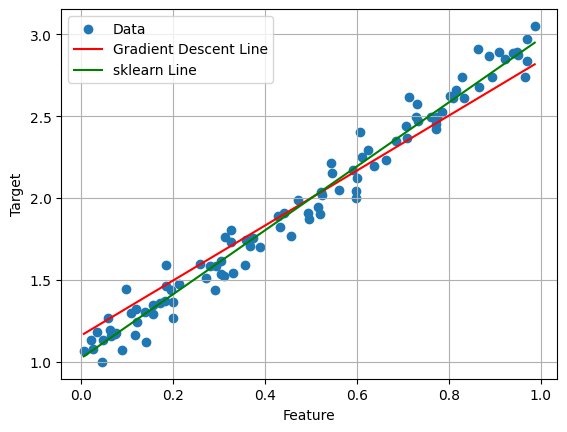

In [20]:
# Your provided functions
def mse_loss(X, Y, w1, w0):
    n = len(X)
    return (1 / n) * np.sum((Y - (w1 * X[:, 0] + w0)) ** 2)

def gradient(X, Y, w1, w0):
    n = len(X)
    y_pred = w1 * X[:, 0] + w0
    w1_grad = (2 / n) * np.sum((Y - y_pred) * (-X[:, 0]))
    w0_grad = (2 / n) * np.sum(Y - y_pred) * (-1)
    return w1_grad, w0_grad

def gradient_descent(X, Y, learning_rate=0.1, epsilon=0.0001, n_iteration=100):
    w1 = w0 = 0
    nw1 = w1
    nw0 = w0

    for i in range(n_iteration):
        cur_w1 = nw1
        cur_w0 = nw0

        w1_grad, w0_grad = gradient(X, Y, cur_w1, cur_w0)

        nw1 = cur_w1 - learning_rate * w1_grad
        nw0 = cur_w0 - learning_rate * w0_grad

        loss = mse_loss(X, Y, nw1, nw0)

        if abs(cur_w1 - nw1) <= epsilon and abs(cur_w0 - nw0) <= epsilon:
            break

    print(f"Gradient Descent - Final coefficients: ω1 = {nw1}, ω0 = {nw0}, MSE = {loss}")
    return nw1, nw0

np.random.seed(42)
X = np.random.rand(100, 1)
Y = 2 * X[:, 0] + 1 + 0.1 * np.random.randn(100)

plt.scatter(X, Y, label='Data')
plt.xlabel('Feature')
plt.ylabel('Target')

nw1, nw0 = gradient_descent(X, Y)

x_line = np.linspace(min(X), max(X), 100)
y_line = nw1 * x_line + nw0
plt.plot(x_line, y_line, color='red', label='Gradient Descent Line')

model = LinearRegression()
model.fit(X, Y)
y_sklearn = model.coef_[0] * x_line + model.intercept_
plt.plot(x_line, y_sklearn, color='green', label='sklearn Line')

plt.legend()
plt.grid()
plt.show()